# Modulos y carga de datos

In [296]:
# Importes
# basicos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Imputacion
from sklearn.impute import KNNImputer

# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Matriz de contingencia
from scipy.stats import chi2_contingency # module for Chi-Squared Test
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
# Machine Learning models
# Modules of Machine Learning Models
from sklearn.linear_model import LogisticRegression # Logistic Regression model class
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier class
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier class

# Carga de datos
df1 = pd.read_excel("Data_prueba_Titanic F.xlsx", sheet_name="Data1")
df2 = pd.read_excel("Data_prueba_Titanic F.xlsx", sheet_name = "Data2")

titanic = pd.merge(df1,df2,on ="PassengerId" )



La pregunta clave sobre qué tipo de personas tenían más probabilidades de sobrevivir al desastre del Titanic nos conduce a explorar a través del análisis probabilístico. Con una información demográfica detallada de la población a bordo, buscamos comprender cómo ciertas variables podrían influir en las posibilidades de supervivencia.

Una segunda pregunta de interés es: después de haber identificado las variables que impactan dicha probabilidad, ¿cuál es la importancia de estas variables en el cálculo de dicha probabilidad?

Dada la naturaleza del problema (muerte en el Titanic), el modelo debe responder a la probabilidad de muerte dado que se es pasajero del Titanic, utilizando las variables proporcionadas.

## Propuesta

Dicho de otra manera,se definel las variables aleatorias 

 * $Y: \text{Se sobrevive}$ 
 * $X: \text{Variables exogenas}$

Entonces; el modelo (independiente de la naturaleza del mismo) debe de responder por la probabilidad condicional:

$$P(Y|X) =  \frac{P(Y,X)} {P(X)}$$

Nos proponemos calcular la probabilidad condicional $P(X|Y)$, es decir, la probabilidad de sobrevivir en el Titanic dadas ciertas variables asociadas al analisis. Suponga por un momento que nos interesa conocer la probailidad de supervivencia dada el genero; para este caso $X= \text{Ser hombre}$. 
Este enfoque nos lleva a considerar la probabilidad conjunta $P(X,Y)$, que representa la probabilidad de sobrevivir y ser pasajero Hombre del Titanic, así como la probabilidad marginal $P(X)$, que representa la probabilidad de haber sido un hombre pasajero. 

Una primera aproximación frecuentista, basada en conteos, podría ayudarnos a comprender el problema. Sin embargo, esta aproximación es meramente descriptiva y limitada en su capacidad predictiva. Para una modelización más precisa, necesitamos un enfoque más complejo que nos permita hacer predicciones más precisas.

La pregunta entonces se reduce a, ¿Como modelar la probabilidad de sobrevivir dada ciertas caracteristicas?. 
Dicho en cristiano, si se desea entender cuales personas tenian mayores proabilidad de supervivencia se ha de tener en cuenta un analisis de variables que impactan la proabilidad de supervivencia y analizar si por ejemplo, ser hombre, mujer, niño, rico o pobre de da mas/menos chance de supervivencia

El analisis aqui propuesto tien 3 grandes fases, limpieza, analisis y modelacion de datos. 

## Supuestos

Desde un punto de vista común, se espera que la mayoría de los supervivientes sean mujeres y niños, debido al patrón general de priorizar su rescate en situaciones de emergencia marítima. Esta práctica se refleja comúnmente en películas y relatos de naufragios. Por lo tanto, se anticipa que existe una correlación entre pertenecer a un grupo demográfico específico y la probabilidad de supervivencia.

Se supone también que el evento no es completamente aleatorio, como se mencionó anteriormente. Esta hipótesis debe ser examinada para determinar su veracidad.

Se asume un escenario en el que los datos recopilados representan de manera adecuada a la población (es decir, datos no sesgados ni mal ingresados).

El análisis se enfoca principalmente en aspectos estadísticos y numéricos. Se ha demostrado que uno de los principales factores agravantes en el número de muertes en el Titanic fue la escasez de botes salvavidas en relación con la cantidad de personas a bordo.

En este caso particular, los métodos de imputación para datos faltantes (en caso de que existan) podrían introducir un sesgo significativo en los datos, dada la naturaleza del problema.

# Metodos de conteo

Como se mencionó anteriormente y a manera de ejercicio ilustrativo, se proceded a calcular las probabiliades de:

 * $P(X) = \text{Pasajero masculino}$
 
 * $P(Y) = \text{Probabilidad de supervivencia}$

 * $P(X,Y) = \text{Se es pasajero masculino que sobrevive al Titanic}$

Para el calculo de este primer ejercicio, tenga en cuenta la base de datos. De allí se tiene que:

In [297]:
titanic['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

De esta primera entrada, se puede deducir que hay un total de 891 datos, de los cuales 549 personas no sobreviven y 342 sí. Con esto, es evidente pensar que la probabilidad de sobrevivir, $ P(Y) = \frac{342}{891} \approx 0.38 $. Este valor podría tomarse como una aproximación muy simple para comprender el fenómeno, suponiendo que solo se tiene información sobre los supervivientes y no sobre los no supervivientes.

Por otro lado, al observar los supervivientes en función del género, notamos que:


In [298]:
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


Con la anterior tabla se pueden calcular las probabilidades (por métodos de conteo) los valores para la probabilidad de ser hombre y la probabilidad de ser hombre y sobrevivir.

- $P(X) = \text{Pasajero masculino} = \frac{577}{891} \approx 0.65$

- $P(X,Y) = \text{Se es pasajero masculino que sobrevive al Titanic} =\frac{109}{891} \approx 0.1223 $

Finalmente, la probabilidad condicional propuesta es:

$$P(Y|X) =  \frac{P(Y,X)} {P(X)} = \frac{0.1223}{0.65} \approx 0.18815$$

Haciendo un ejercicio similar, llegamos a la conclusión de que la probabilidad de supervivencia para las mujeres es de aproximadamente el 74%; lo que para este primer ejercicio ilustra que la probabilidad de supervivencia se ve afectada por el género.

Estos cálculos permiten entender que el análisis de la supervivencia en efecto `depende` de las variables que afectan el fenómeno. El método de conteo permite ilustrar la importancia de técnicas más sofisticadas para **comprender** a mayor profundidad este fenómeno.

Es pues la naturaleza de este fenómeno, la `clasificación`. Dada la base de datos, se propone intentar predecir cuándo una persona sobrevive dadas las características de la misma; es decir, se desea **clasificar** si esta persona **vive o no** en función del género, la edad, el ticket y demás features presentes en el análisis.

La clasificación, al igual que los métodos de conteo, es una técnica de la estadística para responder a este problema solo que un poco más robusta, compleja y sabrosa para abarcar retos de esta índole. Contar puede ser útil para **comprender** el fenómeno, pero en definitiva, aplicar modelación matemático-estadística permite tener mayor precisión para con los análisis.

El proceso de modelado sigue 4 grandes pasos: Limpieza de datos, análisis de datos, modelado de datos, evaluación de resultados. El primer paso inmediato, conocido como manejo de datos (Data wrangling), busca entender la calidad de los datos y estandarizarlos para el proceso mencionado.



# Data wrangling

Se procede a realizar un analisis de calidad de datos en aras de preparar datos para analisis.



In [299]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


Note que la variable Fare ha de ser numerica sin embargo, la lectura detecta esta columna como un "objeto". Al analizar en profundidad se descubre un problema en la forma en que se inputan los datos en el excel. 

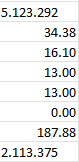

Existen registros que poseen 2 puntos decimales. Existe la posibilidad de que el primer punto sea un separador de miles y el segundo sea un separador de decimales o bien, el primer punto es un separador de decimales y el segundo punto ha sido un error de inputacion. Para efectos de este ejercicio, valores como 5.123.292 se tomarán como 5123.293 USD (Cinco mil ciento veinte y tres dolares con 293 centavos). Esto claramente inflaria el valor de la variable Fare puesto que si el valor real a inputarse es radicalmente diferente en funcion de que opcion se tome (500 dolares vs 5.000 dolares).

Se proceede a hacer dicha correcion en la columna Fare
 


In [300]:
def limpiar_valor(valor_str):
    # Invertir string, facilita este ejercico
    valor_str_invertido = valor_str[::-1]
    valor_sin_decimal = valor_str_invertido.replace('.', ',', 1)
    valor_sin_miles = valor_sin_decimal.replace('.', '')
    valor_limpio = valor_sin_miles.replace(',', '.')
    valor_final = valor_limpio[::-1]
    return float(valor_final)

titanic['Fare'] = titanic['Fare'].apply(lambda x: limpiar_valor(str(x)))
titanic["Fare"] = titanic["Fare"].astype(float)
titanic["Fare"].describe()

count     891.000000
mean      143.044352
std       407.434301
min         0.000000
25%        10.500000
50%        29.125000
75%        83.475000
max      5123.292000
Name: Fare, dtype: float64

De manera general, se verifica que la lectura de la base de datos haya sido la correcta y la estructura de las variables asociadas al dataframe sea el adecuo. 

In [301]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,143.044352
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,407.434301
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,29.125000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,83.475000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,5123.292000


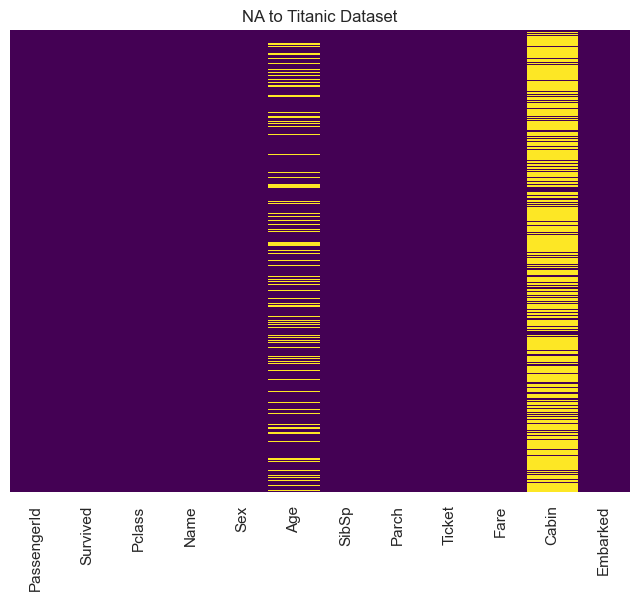

In [302]:

plt.figure(figsize=(8, 6))
sns.heatmap(titanic.isnull(), yticklabels=False, cmap='viridis', cbar=False)
plt.title('NA to Titanic Dataset')
plt.show()


Las variables Age y Cabin tienen una cantidad significativa de datos faltantes. 

El grupo donde hubo un mayor numero de fallecidos fue el grupo de adultos, sin embargo este grupo asu vez es el mas grande de todos los grupos. 

## Analisisde datos faltanes

En este apartado se ha de tratar los datos faltantes. Todas las graficas anteriores se han realizado sin tener en cuenta los datos NA. Se procede a analizar que hacer con estas variables en cuestion una vez se identifique aquellas que representen problemas

In [303]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Es evidente que las variables Age y Cabin muestran un gran número de valores faltantes. La forma de abordar esta situación depende del juicio de un experto y de la decisión sobre cómo tratarla, considerando que la imputación puede ser válida siempre y cuando no introduzca sesgos significativos en los datos. En este caso, se optará por descartar las variables que tengan más del 50% de datos faltantes para evitar sesgos en el análisis. Se parte del supuesto de que imputar el 50% de la información podría introducir errores significativos, ya que esto podría aumentar la varianza debido a la falta de datos. Este criterio está abierto a correciones/discusiones. 


In [304]:
for col in titanic:
    if titanic[col].isna().sum() >= (titanic.shape[0]/2):
        titanic= titanic.drop(columns = col)
titanic.isna().sum() # se elimina Cabin

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

La forma de imputar los datos de la edad (Age) puede considerar la media de los valores existentes. Dado que la edad sigue una distribución normal, la imputación mediante la media no necesariamente es incorrecta. Sin embargo, el gran número de valores faltantes para la edad, que asciende a 177 observaciones, puede distorsionar significativamente la distribucion de Age al concentrar los datos. Es decir, se estaría sesgando la distribución hacia el valor medio. Este enfoque podría ser aceptable si la cantidad de datos faltantes no fuera relativamente alta, lo cual no es el caso, ya que representa aproximadamente el 20% de los datos disponibles (177 de 891 observaciones). Por lo tanto, en este escenario, se opta por emplear una técnica de regresión más robusta para la imputación de los valores faltantes en la edad.


In [305]:

categorical = [x for x in titanic.columns if titanic[x].dtype == "object"]
numerical = [x for x in titanic.columns if x not in categorical]
# Imputaor con 5 vecinos
imputer = KNNImputer(n_neighbors=5)

indice = pd.Series()

# Numericas
titanic_numeric = titanic.select_dtypes(include=[np.number])
titanic_imputed = imputer.fit_transform(titanic_numeric)

# Convertimos el resultado en un DataFrame y restauramos los nombres de las columnas
titanic_imputed = pd.DataFrame(titanic_imputed, columns = numerical)
titanic_imputed.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.0,1.0,0.0,7.250
1,2.0,1.0,1.0,38.0,1.0,0.0,712.833
2,3.0,1.0,3.0,26.0,0.0,0.0,7.925
3,4.0,1.0,1.0,35.0,1.0,0.0,53.100
4,5.0,0.0,3.0,35.0,0.0,0.0,8.050


<Axes: >

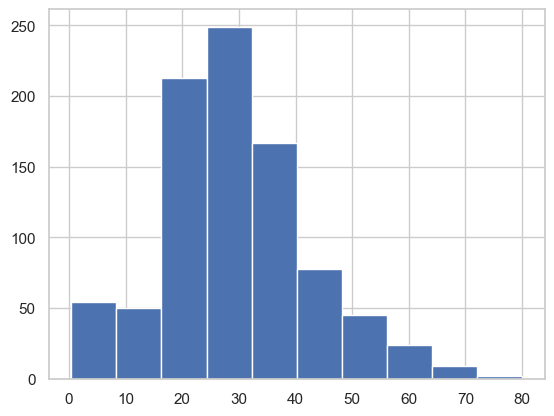

In [306]:
titanic_imputed["Age"].hist()

In [307]:
titanic= pd.concat([titanic[categorical],titanic_imputed], axis = 1 )
titanic_imputed= pd.concat([titanic[categorical],titanic_imputed], axis = 1 )
# Como solo hay 2 registros faltantes, se reemplaza por la moda
titanic["Embarked"].fillna(titanic_imputed["Embarked"].mode()[0], inplace = True)


# Analisis descriptivo

In [308]:
titanic.columns
# se procede a eliminar las variables que NO son representativas para el analisis

titanic.drop(['PassengerId','Name'], axis =1, inplace = True)

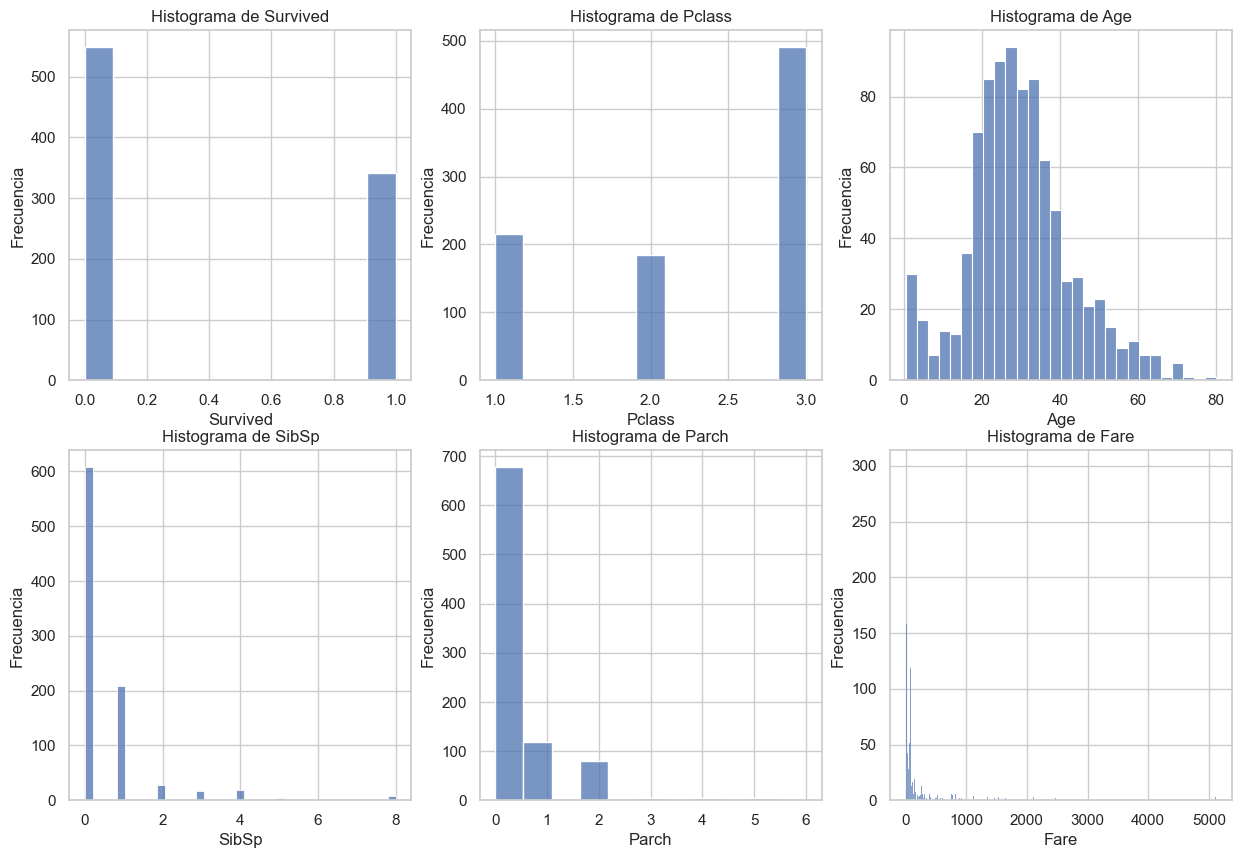

In [309]:

numeric_columns = [col for col in titanic.columns if titanic[col].dtype in ['float64', 'int64']]
plt.figure(figsize=(15, 10))

for i in range(len(numeric_columns)):
    plt.subplot(2, 3, i+1)
    sns.histplot(titanic[numeric_columns[i]])
    plt.xlabel("{}".format(numeric_columns[i]))
    plt.ylabel("Frecuencia")
    plt.title("Histograma de {}".format(numeric_columns[i]))

plt.show()

**Insights**

- La proporción de supervivientes es menor que la de fallecidos.

- La clase socioeconómica más común es la 3. La proporción de clases tipo 1 y 2 es casi la misma.

- Hay una proporción alta de infantes (edades cercanas a cero).

- La edad promedio parece seguir una distribución normal. Hay pocas personas mayores de 60 años.

- Lo más común es tener, como máximo, 1 hermano a bordo.

- Lo más común es tener, como máximo, 2 padres/hijos a bordo.

- La tarifa (Fare) tiene una distribución de cola pesada a la derecha. Dado que los datos están representados en dólares, es poco probable que existan precios de tickets mayores a 1000 dólares dada la época. Esto último puede deberse a la forma en que se ingresan los datos.

- Fare y Age se deben analizar para identificar valores atípicos y tener un mayor entendimiento de dicha distribución de datos.


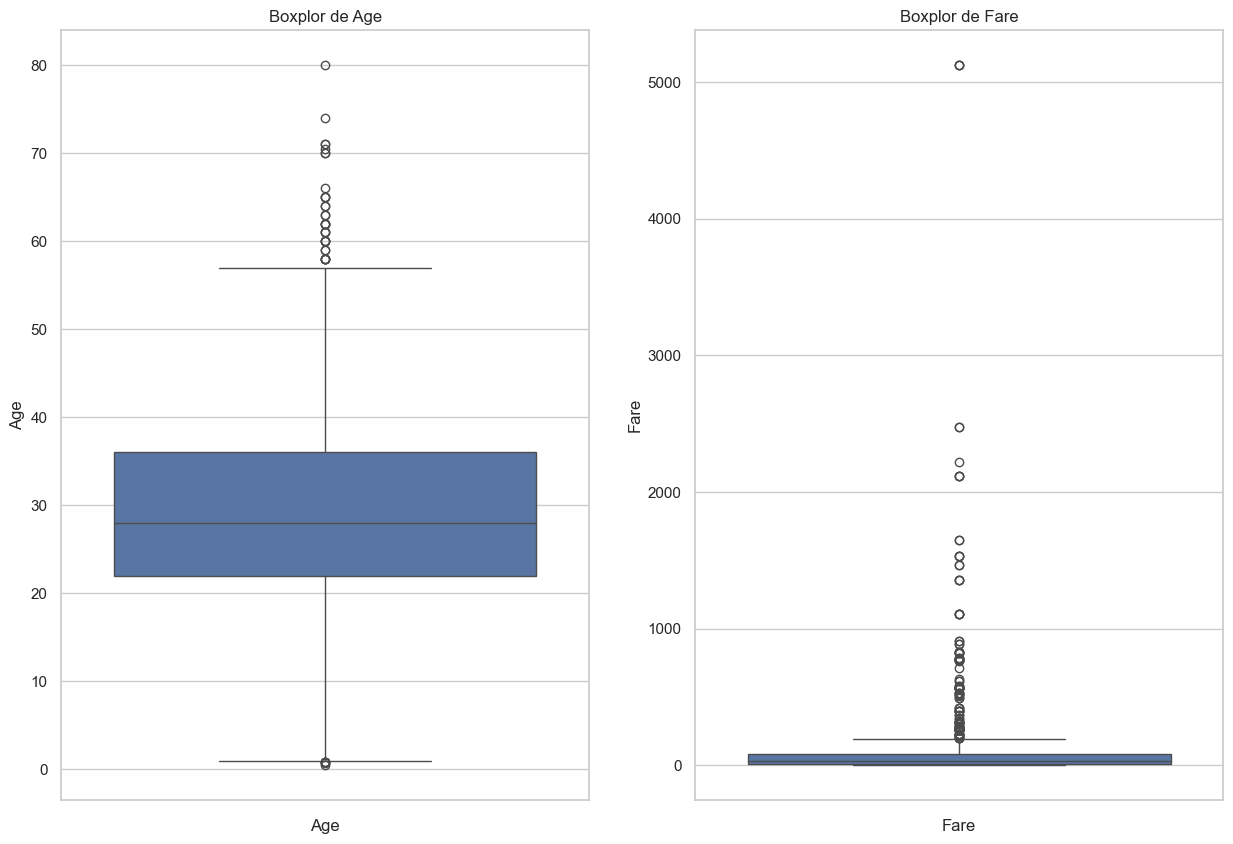

In [310]:
box_chart = ["Age", "Fare"]
plt.figure(figsize=(15,10))
for i in range(len(box_chart)):
    plt.subplot(1,2,i+1)
    sns.boxplot(titanic[box_chart[i]])
    plt.xlabel("{}".format(box_chart[i]))
    plt.title("Boxplor de {}".format(box_chart[i]))
plt.show()

- La edad tiene algunos datos atípicos que deben ser tratados.

- Fare tiene un número significativo de datos atípicos, aunque no es necesario intervenirlos de inmediato, ya que este método gráfico supone una distribución normal en los datos. Sin embargo, esta variable se discutirá más adelante.


Los gráficos anteriores permiten comprender de manera general los datos y su estructura. Ahora se desea **entender** las características de los supervivientes. Para ello, observe lo siguiente:

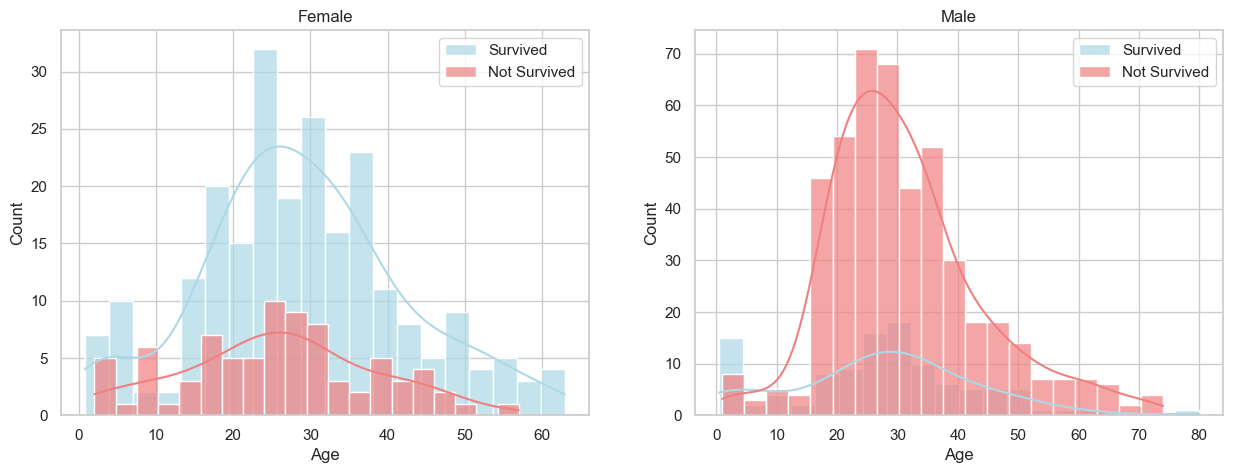

In [311]:
## Se procede a recategorizar las variables para hacer graficso atractivos

survived_label = 'Survived'
not_survived_label = 'Not Survived'
gender_categories = ['female', 'male']
colors = ['lightblue', 'lightcoral']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# NOTA MENTAL: Viva ggplotGod. Matplotlib sucks
for i, gender in enumerate(gender_categories):
    subset = titanic[titanic['Sex'] == gender]
    survived_age = subset[subset['Survived'] == 1]['Age'].dropna()
    not_survived_age = subset[subset['Survived'] == 0]['Age'].dropna()
    sns.histplot(survived_age, bins=20, color=colors[0], label=survived_label, ax=axes[i], kde=True, alpha=0.7)
    sns.histplot(not_survived_age, bins=20, color=colors[1], label=not_survived_label, ax=axes[i], kde=True, alpha=0.7)
    axes[i].legend()
    axes[i].set_title(f"{gender.capitalize()}")


plt.show()


**Insights**

- Note que del total de mujeres en la base de datos, la inmensa mayoría sobrevivieron, con edades más comunes entre los 20 y 40 años.

- La cantidad de mujeres que fallecieron es proporcionalmente inferior a las que sobrevivieron. Las edades de las que fallecieron son más heterogéneas entre sí, ya que no se concentran tanto en un rango específico de edades.

- En el caso de los hombres, sucede lo contrario a lo mencionado anteriormente; es decir, la proporción de hombres supervivientes es mucho más baja que la de los que no sobrevivieron. Este hallazgo indica que ser hombre podría incidir negativamente en la probabilidad de supervivencia.

- La mayoría de hombres que fallecen tienen edades entre los 20 y 40 años.

- Los hombres que sobreviven tienen edades entre los 20 y 35 años, según lo observado visualmente.

 

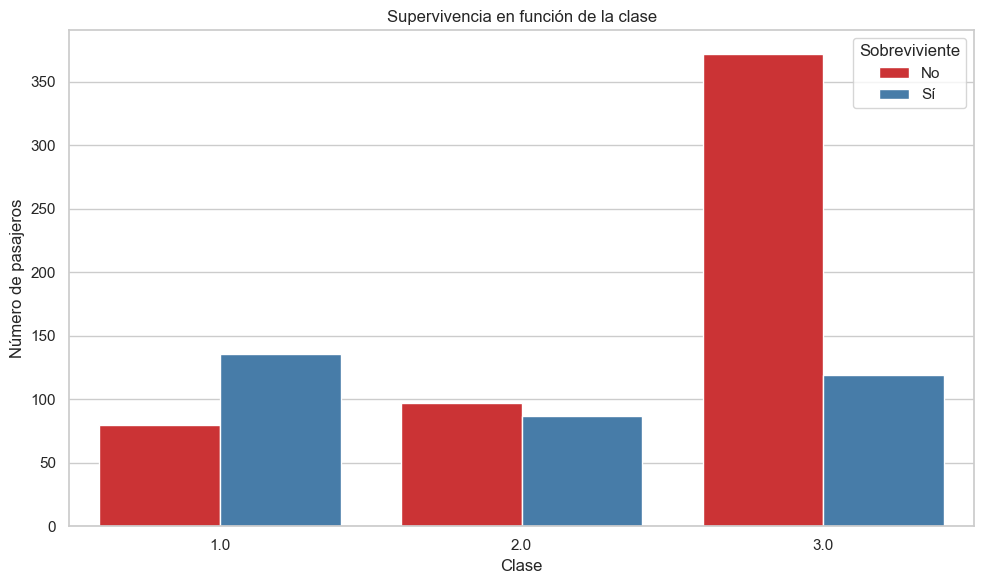

In [312]:

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x="Pclass", hue="Survived", data=titanic, palette="Set1")
plt.title("Supervivencia en función de la clase")
plt.xlabel("Clase")
plt.ylabel("Número de pasajeros")
plt.legend(title="Sobreviviente", labels=["No", "Sí"])

plt.tight_layout()
plt.show()


La clase 3 posee el mayor numero de fallecidos. Pertenecer a la clase 3 aporta a la probabilidad de fallecimiento. 

## Categorizacion variable edad

Se procede a crear categorias para las edades. Se propone crear una variable que identifique a una persona dada la edad, para ello se proponen las siguientes categorias. 

* Niño: 0-14 años

* Adolescente: 15-18 años

* Adulto joven: 19-25 años

* Adulto: 26-60 años

* Adulto mayor: >60 años

In [313]:
bins = [0, 14, 18, 25, 60, float('inf')]
labels = ['Niños', 'Adolescente', 'Adulto Joven', 'Adulto', 'Adulto Mayor']
titanic['Age_Category'] = pd.cut(titanic['Age'], bins=bins, labels=labels, right=False)
titanic.Age_Category.value_counts()

Age_Category
Adulto          540
Adulto Joven    208
Niños            73
Adolescente      44
Adulto Mayor     26
Name: count, dtype: int64

Dado el rango asociado para la edad, la inmensa mayoria de la poblacion se encuentra entre niños, adultos jovenes y adultos. 

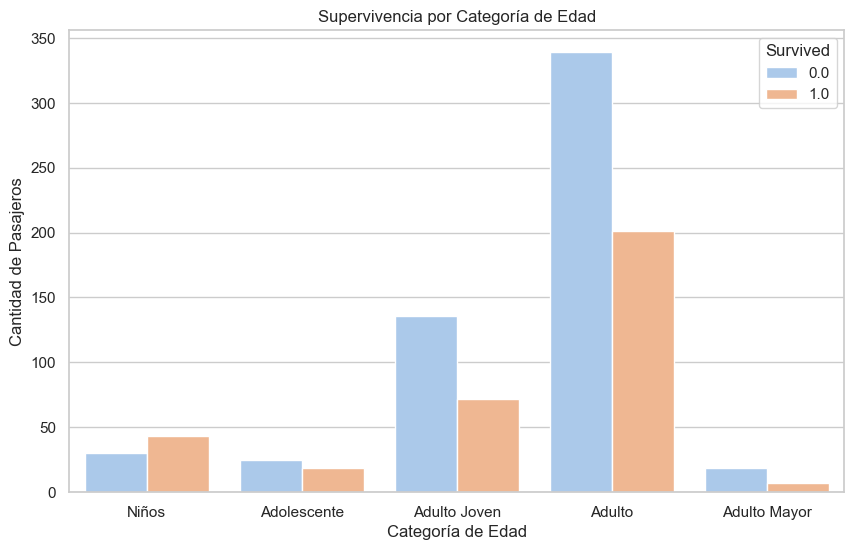

In [314]:

sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='Age_Category', hue='Survived', palette='pastel')

# Agregar título y etiquetas
plt.title('Supervivencia por Categoría de Edad')
plt.xlabel('Categoría de Edad')
plt.ylabel('Cantidad de Pasajeros')

# Mostrar el gráfico
plt.legend(title='Survived', loc='upper right')
plt.show()


# Codificacion variables categoricas

In [315]:
titanic_imputed = titanic
titanic.isna().sum()

Sex             0
Ticket          0
Embarked        0
Survived        0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Age_Category    0
dtype: int64

Hasta este momento se ha verificado que NO hay datos faltantes y los que habian, han sido debidamente inputados. Se procede a codificar las variables categoricas para implementarlar correctamente en el modelo a usar.



In [316]:
master_table = pd.get_dummies(titanic_imputed.drop("Ticket",axis =1), dtype = "float",drop_first=False)
master_table.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Category_Niños,Age_Category_Adolescente,Age_Category_Adulto Joven,Age_Category_Adulto,Age_Category_Adulto Mayor
0,0.0,3.0,22.0,1.0,0.0,7.250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,38.0,1.0,0.0,712.833,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.925,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,35.0,1.0,0.0,53.100,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.050,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


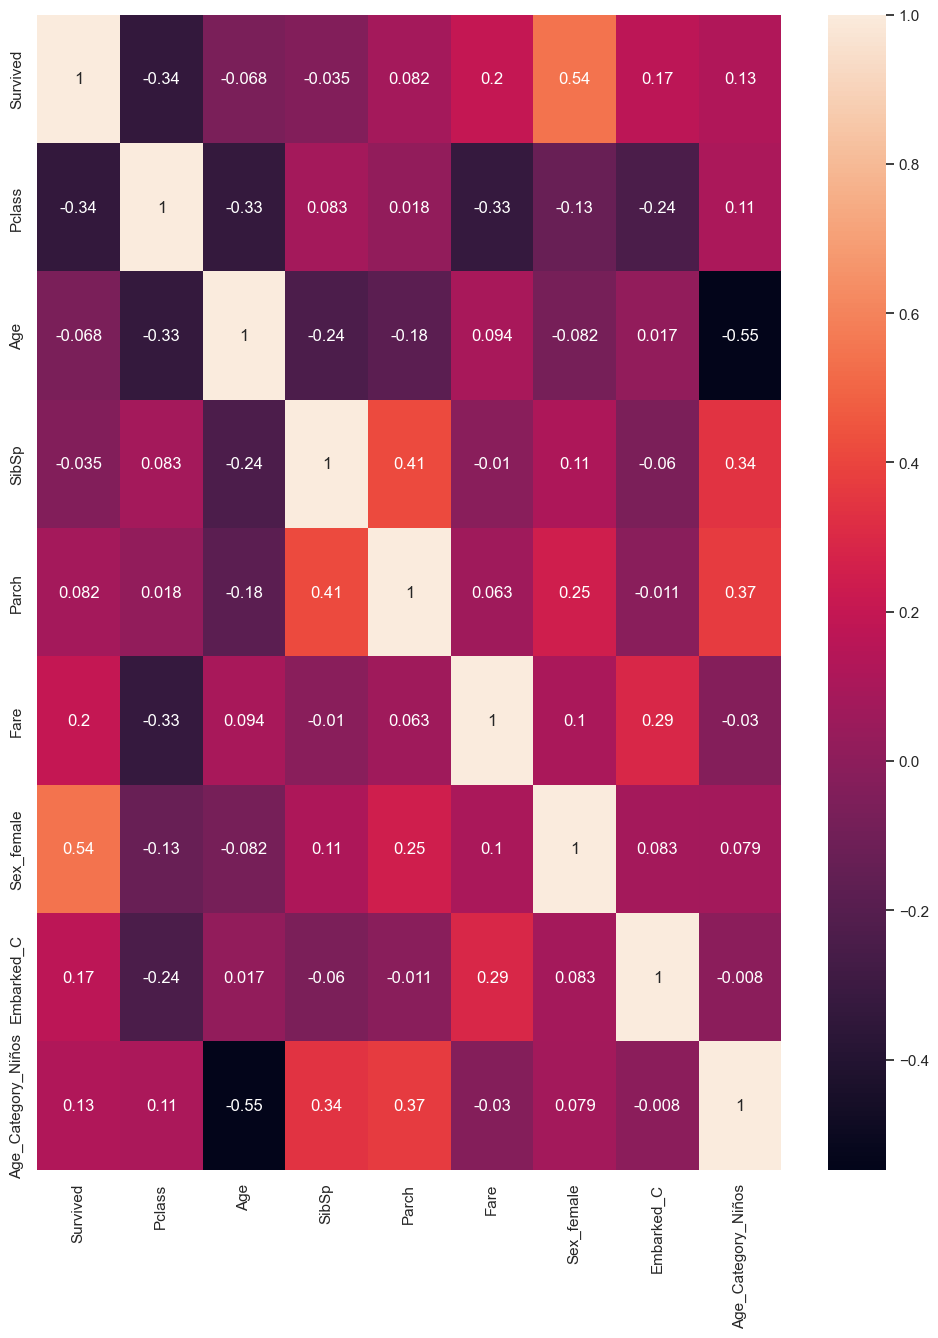

In [317]:
plt.figure(figsize =(12,15))
sns.heatmap(master_table.drop(["Sex_male", "Embarked_Q","Embarked_S", 'Age_Category_Adolescente',
       'Age_Category_Adulto Joven', 'Age_Category_Adulto',
       'Age_Category_Adulto Mayor'], axis = 1).corr(), annot =True)
plt.show()

La correlacion entre Survived y las demas covariables parece ser debil respecto a las variables Fare y Pclass. De alguna manera se podria esperar que esta variables sean las que mayor ipacto tengan en el calculo probabilistico de la superviencia.  Las demas covariables presentan una correlacion que a priori no parece ser significativa (Al menos, no linealmente)

# Train-Test Split

Se procede a particionar los datos entre datos de entrenamiento y datos de prueba.

In [318]:
X = master_table.drop(columns=['Survived'])
y = master_table['Survived']

# Division entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1998)


# Escalado de variables y modelamiento

De manera general, se realizan las predicciones y se tiene las siguientes metricas:

 * ROC-AUC: Entre mas cercano a 1, mejor, puesto que el area bajo la curva representa la probabilidad de clasificar correctametne una observacion.

 * Accuracy Score:  Numero de exitos/ Numero total de intentos; dicho de otra manera, mide cuantas clasificaciones corerctas se realizaron, es decir, cuantas personas se predijeron como supervivientes y en efecto eran supervivientes. 

 * Recall Score: Mire la cantidad de observaciones bien clasificadas(verdaderos positivos) sobre el total de veraderos positivos + falsos negativos
 
 $$\frac{TP}{TP+FN}$$

 En cristiano, mide la proporcion de clasificaciones correctas. 

 * Precision: Similar al anterior pero mide todas las instancias positivas bien clasificadas sobre todas las instancias positivas.

  $$\frac{TP}{TP+FP}$$

  Lo que en este caso mediria seria cuando una persona en efecto fue superviviente y el modelo asi lo predijo. De todas estas observaciones, compara las que el modelo acertó de manera positiva en la suma de todas las positivas. 

  * F1-Scorde: Un hibrido entre la precision y el Recall. Aqui se desea u numero relativamente alto (Cercano a 1) que indicaria que el modelo tiene la capacidad de detectar correctamente Falsos positivos y falsos negativos, maximizando las precisiones correctas. 

`Regresion Logistica`

In [319]:

X = master_table.drop(columns=['Survived'])
y = master_table['Survived']

sc = StandardScaler()
X = sc.fit_transform(X)

# Division entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1998) 


In [320]:
LR = LogisticRegression(max_iter=10000) # mirar con y sin iteraciones modificadas
LR.fit(X_train, y_train)
lr_predicctions = LR.predict(X_test)


In [321]:
roc_auc = round(roc_auc_score(y_test, lr_predicctions), 4)
accuracy = round(accuracy_score(y_test, lr_predicctions), 4)
recall = round(recall_score(y_test, lr_predicctions), 4)
precision = round(precision_score(y_test, lr_predicctions), 4)
f_one = round(f1_score(y_test, lr_predicctions), 4)

# Return evaluation scores
print(f"=========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"=========================")

 ROC-AUC Score: 0.7408
 Accuracy Score: 0.7542
 Recall Score: 0.6761
 Precision Score: 0.6957
 F1-score: 0.6857


`Random Forest`


In [322]:
# Pendiente hiper parametros: Cuando tengamos mejor PC
RFC=RandomForestClassifier() 
RFC.fit(X_train, y_train)
rfc_predictions = RFC.predict(X_test)


In [323]:
roc_auc = round(roc_auc_score(y_test, rfc_predictions), 4)
accuracy = round(accuracy_score(y_test, rfc_predictions), 4)
recall = round(recall_score(y_test, rfc_predictions), 4)
precision = round(precision_score(y_test, rfc_predictions), 4)
f_one = round(f1_score(y_test, rfc_predictions), 4)

# Return evaluation scores
print(f"=========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"=========================")

 ROC-AUC Score: 0.7549
 Accuracy Score: 0.7654
 Recall Score: 0.7042
 Precision Score: 0.7042
 F1-score: 0.7042


`KNN`


In [324]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
knn_predictions = KNN.predict(X_test)


In [325]:

roc_auc = round(roc_auc_score(y_test, knn_predictions), 4)
accuracy = round(accuracy_score(y_test, knn_predictions), 4)
recall = round(recall_score(y_test, knn_predictions), 4)
precision = round(precision_score(y_test, knn_predictions), 4)
f_one = round(f1_score(y_test, knn_predictions), 4)

# Return evaluation scores
print(f"=========================")
print(f" ROC-AUC Score: {roc_auc}")
print(f" Accuracy Score: {accuracy}")
print(f" Recall Score: {recall}")
print(f" Precision Score: {precision}")
print(f" F1-score: {f_one}")
print(f"=========================")

 ROC-AUC Score: 0.7406
 Accuracy Score: 0.7598
 Recall Score: 0.6479
 Precision Score: 0.7188
 F1-score: 0.6815


Una vez ajustados los modelos se ha de revisar el rendimiento de los mismos. 

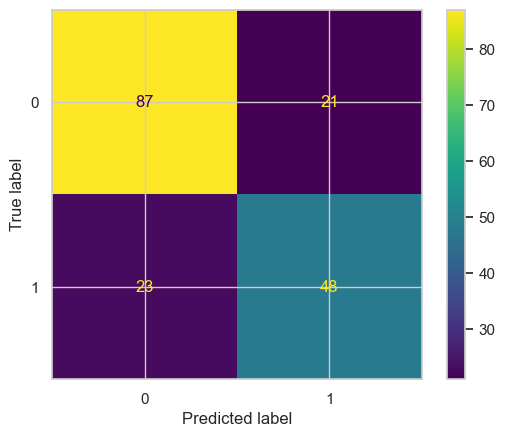

In [326]:

ConfusionMatrixDisplay(confusion_matrix(y_test, lr_predicctions)).plot()
plt.show()

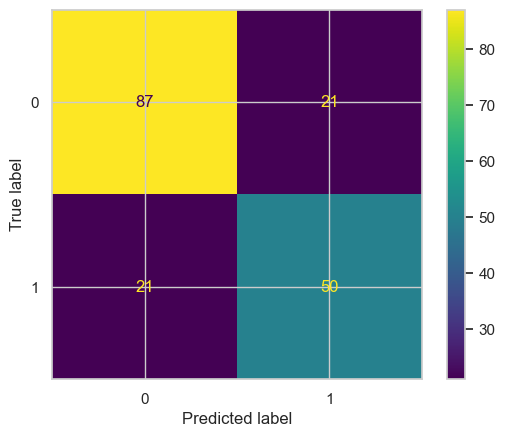

In [327]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rfc_predictions)).plot()
plt.show()

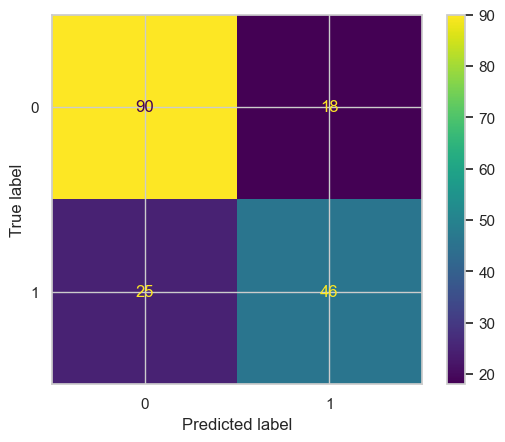

In [328]:
ConfusionMatrixDisplay(confusion_matrix(y_test, knn_predictions)).plot()
plt.show()

La matriz de confusion de cada modelo permite comprender de manera visual cual ha sido el rendimiento asociado a cada prediccion. De manera general, los 3 modelos han tendio rendimientos similares entre si. Sin embargo, por un principio de parsimonia, la regresion logistica representa el modelo optimo a trabajar; puesto que es el mas sencillo y permite tener interpretacion entre los parametros de dicha regresion. Ademas, se puede cuantificar la significancia de dichas variables. En consecuencia, se procede a analizar a profundidad la regresion logistica. 

In [329]:
column_names = master_table.drop(columns=['Survived']).columns.tolist()
coefficients = LR.coef_[0]
# imprtanci vbles
importance_df = pd.DataFrame({'Feature': column_names, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

importance_df


,Feature,Coefficient
5,Sex_female,0.727582
10,Age_Category_Niños,0.291839
4,Fare,0.201628
14,Age_Category_Adulto Mayor,0.074751
8,Embarked_Q,0.073724
7,Embarked_C,0.031942
13,Age_Category_Adulto,-0.008113
9,Embarked_S,-0.074377
11,Age_Category_Adolescente,-0.074402
3,Parch,-0.155808


* Sex_female (Sexo: Femenino): Un coeficiente positivo indica que ser mujer está asociado con una mayor probabilidad de sobrevivir en comparación con los hombres. En este caso, el coeficiente positivo sugiere que las mujeres tenían mayores probabilidades de sobrevivir que los hombres.

* Age_Category_Niños (Categoría de Edad: Niños): Un coeficiente positivo indica que pertenecer a la categoría de Niños está asociado con una mayor probabilidad de sobrevivir en comparación con otras categorías de edad. Esto sugiere que los niños tenían mayores probabilidades de sobrevivir en el desastre.

* Fare (Tarifa): Un coeficiente positivo indica que un aumento en la tarifa del boleto está asociado con una mayor probabilidad de supervivencia. Esto puede significar que las personas que pagaron tarifas más altas tuvieron acceso a mejores condiciones o servicios a bordo que aumentaron sus posibilidades de supervivencia.

* Age_Category_Adulto Mayor (Categoría de Edad: Adulto Mayor): Un coeficiente positivo sugiere que pertenecer a la categoría de Adulto Mayor está asociado con una mayor probabilidad de sobrevivir en comparación con otras categorías de edad.

* Embarked_Q (Puerto de Embarque: Queenstown): Un coeficiente positivo indica que haber embarcado en Queenstown está asociado con una mayor probabilidad de supervivencia. Esto sugiere que los pasajeros que embarcaron en Queenstown tenían mayores probabilidades de sobrevivir.

* Embarked_C (Puerto de Embarque: Cherbourg): Un coeficiente positivo sugiere que haber embarcado en Cherbourg está asociado con una mayor probabilidad de supervivencia.

* Embarked_S (Puerto de Embarque: Southampton): Un coeficiente negativo sugiere que haber embarcado en Southampton está asociado con una menor probabilidad de supervivencia en comparación con otros puertos de embarque.

* Parch (Número de padres/hijos a bordo): Un coeficiente negativo sugiere que tener más padres/hijos a bordo está asociado con una menor probabilidad de supervivencia.

* Age_Category_Adulto Joven (Categoría de Edad: Adulto Joven): Un coeficiente negativo sugiere que pertenecer a la categoría de Adulto Joven está asociado con una menor probabilidad de sobrevivir en comparación con otras categorías de edad.

* SibSp (Número de hermanos/cónyuges a bordo): Un coeficiente negativo sugiere que tener más hermanos/cónyuges a bordo está asociado con una menor probabilidad de supervivencia.

* Age (Edad): Un coeficiente negativo sugiere que un aumento en la edad está asociado con una menor probabilidad de sobrevivir. Esto implica que las personas más mayores tenían menores probabilidades de sobrevivir.

* Sex_male (Sexo: Masculino): Un coeficiente negativo sugiere que ser hombre está asociado con una menor probabilidad de sobrevivir en comparación con las mujeres. En este caso, el coeficiente negativo sugiere que los hombres tenían menores probabilidades de sobrevivir que las mujeres.

* Pclass (Clase del Pasajero): Un coeficiente negativo sugiere que pertenecer a una clase de pasajero más baja está asociado con una menor probabilidad de sobrevivir en comparación con clases más altas.

`Mayor probabilidad de sobrevivir:`

Sexo: Femenino (Sex_female): Un coeficiente positivo indica que ser mujer está fuertemente asociado con una mayor probabilidad de sobrevivir.

Categoría de Edad: Niños (Age_Category_Niños): Un coeficiente positivo sugiere que pertenecer a la categoría de Niños está asociado con una mayor probabilidad de sobrevivir.

Tarifa (Fare): Un coeficiente positivo indica que un aumento en la tarifa del boleto está asociado con una mayor probabilidad de supervivencia.

Puerto de Embarque: Queenstown (Embarked_Q): Un coeficiente positivo sugiere que haber embarcado en Queenstown está asociado con una mayor probabilidad de sobrevivencia.

`Menor probabilidad de sobrevivir:`

Clase del Pasajero (Pclass): Un coeficiente negativo sugiere que pertenecer a una clase de pasajero más baja está asociado con una menor probabilidad de sobrevivir.

Sexo: Masculino (Sex_male): Un coeficiente negativo sugiere que ser hombre está fuertemente asociado con una menor probabilidad de sobrevivir.

Edad (Age): Un coeficiente negativo indica que un aumento en la edad está asociado con una menor probabilidad de sobrevivir.

Por lo tanto, el perfil con mayor probabilidad de sobrevivir sería una mujer joven o una niña que haya pagado una tarifa más alta y haya embarcado en Queenstown, mientras que el perfil con menor probabilidad de sobrevivir sería un hombre mayor que pertenezca a una clase de pasajero más baja y haya embarcado en cualquier puerto que no sea Queenstown.